In [1]:
import umap.umap_ as umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse.linalg import svds
from scipy.spatial.distance import cosine
from scipy.linalg import orthogonal_procrustes

def procrustes_analysis(A,B):
    M = B.T @ A
    U,S,V = np.linalg.svd(M)
    return V @ U.T

#Loading 50000 random samples from the mammoth dataset
mmth1 = pd.read_csv('mammoth_a.csv').sample(50000)
mmth2 = pd.read_csv('mammoth_a.csv').sample(50000)




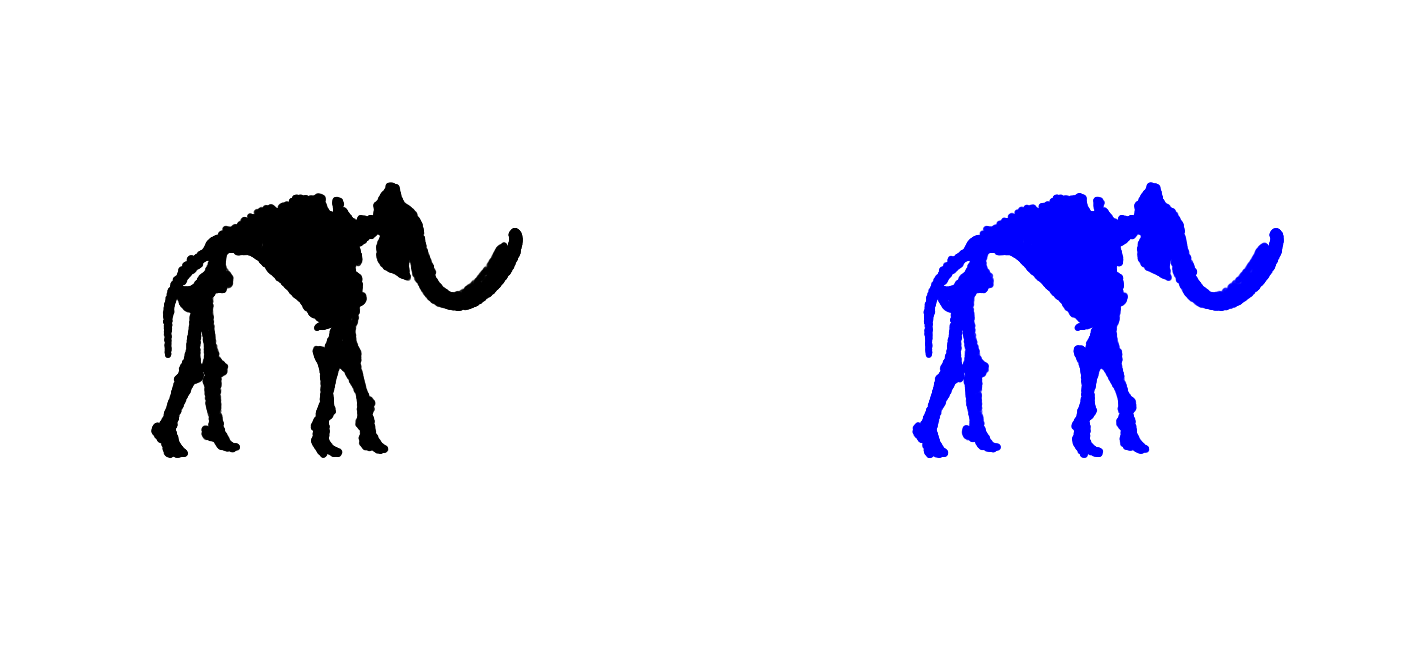

In [2]:
#Plot the mammoths

fig = plt.figure(figsize=(18, 9)) # Adjust the size as needed

# First subplot
ax1 = fig.add_subplot(121, projection='3d') # 1 row, 2 columns, first plot
ax1.set_axis_off()
ax1.scatter(mmth1['x'], mmth1['y'], mmth1['z'], s=10, c='black')
ax1.view_init(0, -180)

# Second subplot
ax2 = fig.add_subplot(122, projection='3d') # 1 row, 2 columns, second plot
ax2.set_axis_off()
ax2.scatter(mmth2['x'], mmth2['y'], mmth2['z'], s=10, c='blue')
ax2.view_init(0, -180)

plt.show()

In [3]:
reducer1 = umap.UMAP(#random_state=42, #The same random state
                    n_components=2,
                    n_neighbors=300, #The same number of NN
                    min_dist=0.1,
                    metric='euclidean',
                    verbose=True)

reducer2 = umap.UMAP(#random_state=42, #The same random state
                    n_components=2,
                    n_neighbors=80, #The same number of NN
                    min_dist=0.1,
                    metric='euclidean',
                    verbose=True)

reducer1.fit(mmth1)
reducer2.fit(mmth2)



UMAP(n_neighbors=300, verbose=True)
Thu Jan 18 17:09:08 2024 Construct fuzzy simplicial set
Thu Jan 18 17:09:08 2024 Finding Nearest Neighbors
Thu Jan 18 17:09:08 2024 Building RP forest with 16 trees
Thu Jan 18 17:09:11 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Thu Jan 18 17:09:51 2024 Finished Nearest Neighbor Search
Thu Jan 18 17:09:56 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Jan 18 17:11:23 2024 Finished embedding
UMAP(n_neighbors=80, verbose=True)
Thu Jan 18 17:11:23 2024 Construct fuzzy simplicial set
Thu Jan 18 17:11:23 2024 Finding Nearest Neighbors
Thu Jan 18 17:11:23 2024 Building RP forest with 16 trees
Thu Jan 18 17:11:23 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Thu Jan 18 17:11:41 2024 Finished Nearest Neighbor Search
Thu Jan 18 17:11:42 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Thu Jan 18 17:13:22 2024 Finished embedding


UMAP(n_neighbors=80, verbose=True)

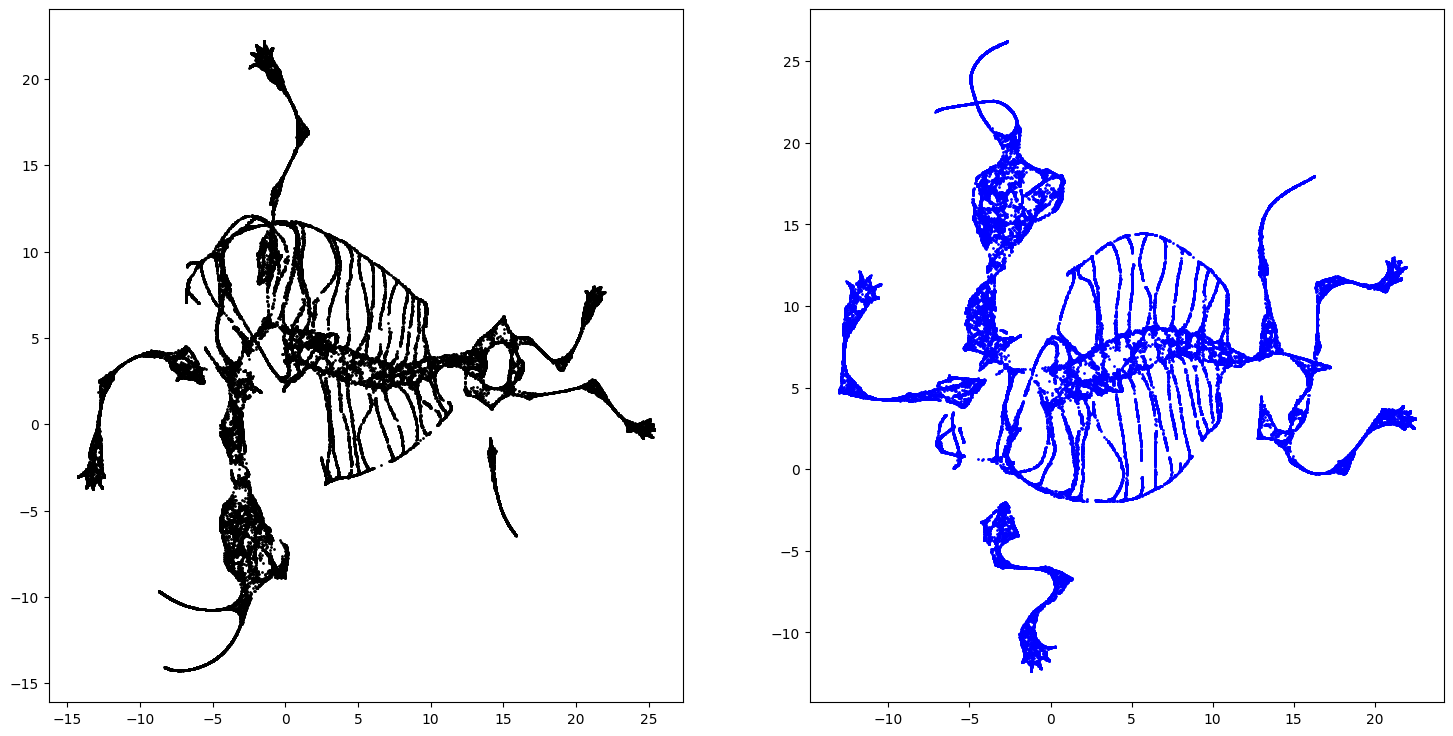

In [4]:
fig = plt.figure(figsize=(18, 9))

# First subplot
ax1 = fig.add_subplot(121) # 1 row, 2 columns, first plot
ax1.scatter(reducer1.embedding_[:, 0], reducer1.embedding_[:, 1], s=1,c='black')

# Second subplot
ax2 = fig.add_subplot(122) # 1 row, 2 columns, second plot
ax2.scatter(reducer2.embedding_[:, 0], reducer2.embedding_[:, 1], s=1,c='blue')

plt.show()



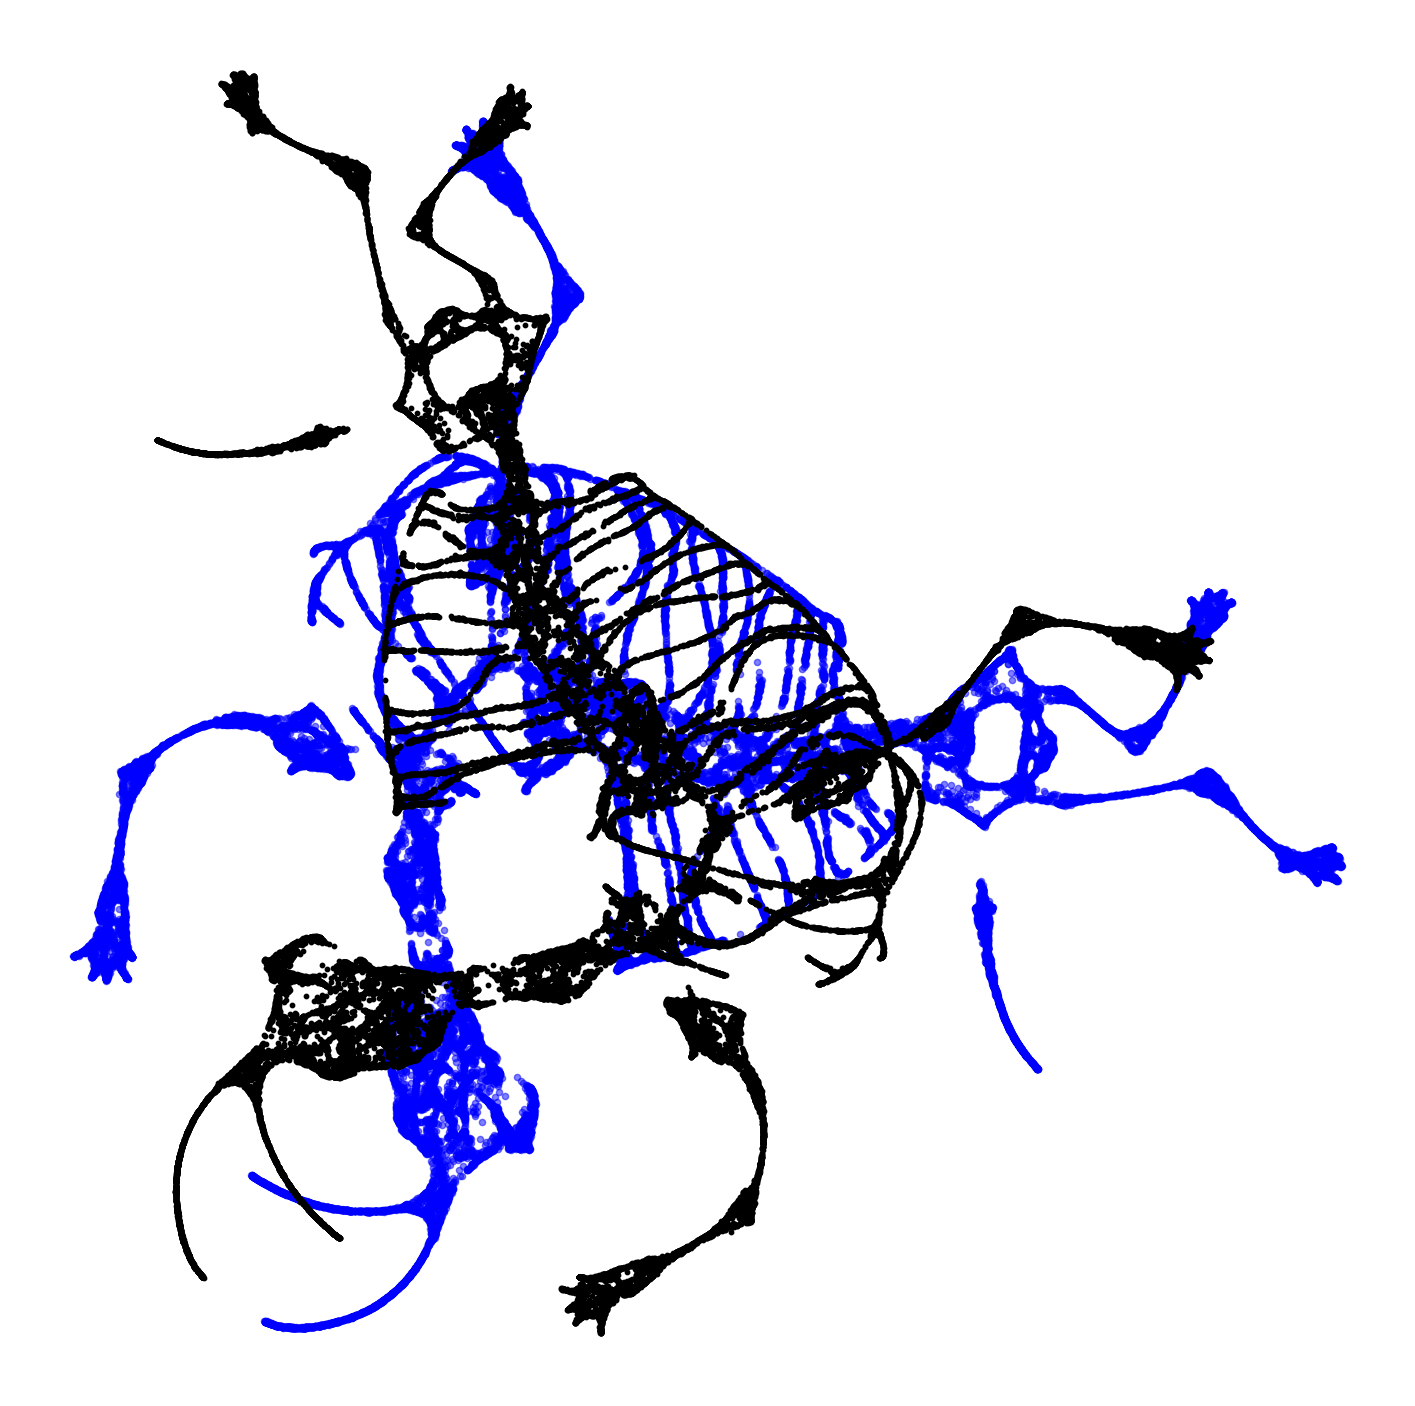

In [5]:
A = reducer1.embedding_.copy()
B = reducer2.embedding_.copy()

R, _ = orthogonal_procrustes(A,B)

proj = A @ R

fig = plt.figure(figsize=(18, 18))

# First subplot
ax = fig.add_subplot(111)
ax.set_axis_off()
ax.scatter(A[:,0], A[:,1], s=20,c='blue',alpha=0.5)
ax.scatter(proj[:,0], proj[:,1], s=10,c='black')

#ax1 = fig.add_subplot(122)
#ax1.scatter(B[:,0], B[:,1], s=10,c='blue',alpha=0.5)
#ax1.scatter(A[:,0], A[:,1], s=10,c='black')